In [1]:
from shared.preface import *
import shared.functions as fct
import shared.my_units as my
import shared.control_center as CC

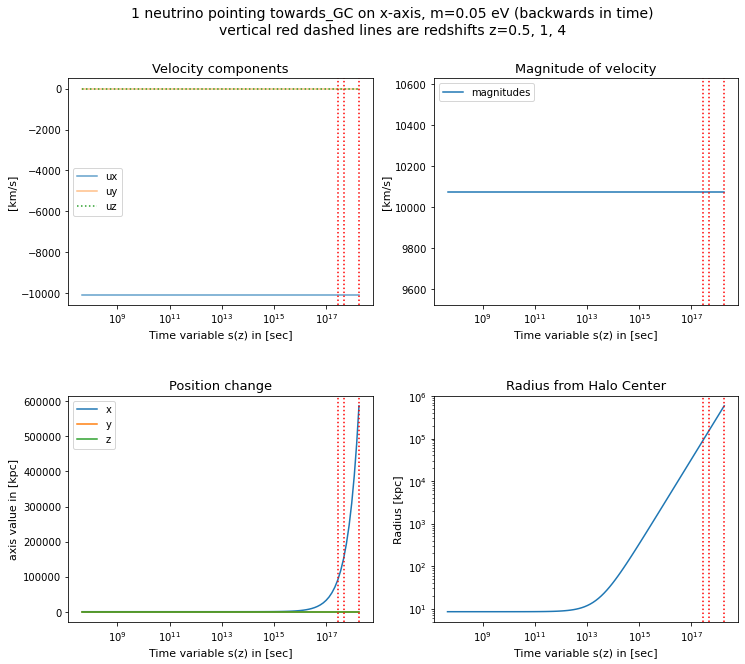

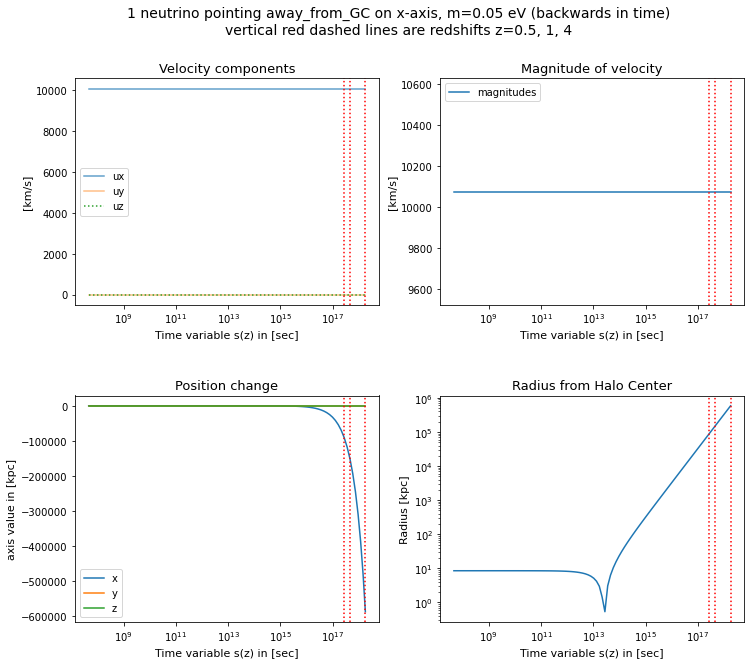

In [2]:
def show_plot(Nr):
    raw = np.load(f'neutrino_vectors/nu_{Nr}.npy')*unit.kpc/unit.s
    u_1nu = raw.to(unit.km/unit.s).value

    #
    ### determine pointing of neutrino relative to GC
    #

    batch_size = CC.THETAs*CC.Vs
    nr_in_array = int(Nr / batch_size)
    ps = np.linspace(0., 2.*np.pi, CC.PHIs)
    val_to_check = ps[nr_in_array]

    direction = 'towards/away'
    if np.pi/2 < val_to_check < 3/2*np.pi:
        direction = 'away_from_GC'
    else:
        direction = 'towards_GC'


    # load velocities
    ux, uy, uz = u_1nu[:,3], u_1nu[:,4], u_1nu[:,5]

    # magnitudes of velocities
    Ms = np.sqrt(ux**2+uy**2+uz**2)

    # range to plot over
    zeds = np.geomspace(1e-10, CC.Z_STOP, CC.Z_AMOUNT)  # log
    H0 = my.H0.to(unit.s**-1).value
    s = np.abs(np.array([fct.s_of_z(z) for z in zeds]) * 1)
    
    #
    ### Initiate figure
    #
    plt.rc('axes', labelsize=11)
    plt.rc('axes', titlesize=13)

    fig, axs = plt.subplots(2,2, figsize=(12,10))
    plt.subplots_adjust(wspace=0.2, hspace=0.4)
    
    if CC.TIME_FLOW > 0:
        time_direction = 'forwards'
    else:
        time_direction = 'backwards'
    fig.suptitle(f'1 neutrino pointing {direction} on x-axis, m=0.05 eV ({time_direction} in time)'
                 '\n'
                 f'vertical red dashed lines are redshifts z=0.5, 1, 4', fontsize=14)

    # Plot 1
    axs[0,0].set_title('Velocity components')
    axs[0,0].semilogx(s, ux, label='ux', alpha=0.7)
    axs[0,0].semilogx(s, uy, label='uy', alpha=0.5)
    axs[0,0].semilogx(s, uz, label='uz', ls=':')
    axs[0,0].set_ylabel('[km/s]')
    axs[0,0].legend()

    # Plot 2
    axs[0,1].set_title('Magnitude of velocity')
    axs[0,1].semilogx(s, Ms, label='magnitudes')
    axs[0,1].set_ylabel('[km/s]')
    axs[0,1].legend()

    # load positions
    u_1nu = raw.value
    x = u_1nu[:,0]
    y = u_1nu[:,1]
    z = u_1nu[:,2]

    # Plot 3
    axs[1,0].set_title('Position change')
    axs[1,0].set_ylabel('axis value in [kpc]')
    axs[1,0].semilogx(s, x, label='x')
    axs[1,0].semilogx(s, y, label='y')
    axs[1,0].semilogx(s, z, label='z')
    axs[1,0].legend()

    # Plot 4
    radius_from_GC = np.sqrt(x**2+y**2+z**2)
    axs[1,1].set_title('Radius from Halo Center')
    axs[1,1].loglog(s, radius_from_GC, label='radius')
    axs[1,1].set_ylabel('Radius [kpc]')

    for i in (0,1):
        for j in (0,1):
            axs[i,j].set_xlabel('Time variable s(z) in [sec]')
            
            # Draw vertical lines corresponding to redhsifts 0.5, 1, 2, 3, 4
            # a[np.abs(a-a0).argmin)]
            axs[i,j].axvline(s[np.abs(zeds-0.5).argmin()], c='r', ls=':')
            axs[i,j].axvline(s[np.abs(zeds-1.).argmin()], c='r', ls=':')
            axs[i,j].axvline(s[np.abs(zeds-4.).argmin()], c='r', ls=':')

    plt.savefig(f'check_plots/velocity_and_position_change_{direction}.pdf')


show_plot(Nr=6) # 5 medium velocity, 6 high
show_plot(Nr=24) # 23 medium, 24 high 